In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [7]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [8]:
kospi200 = pd.read_csv("./data/data.csv", encoding="cp949")
kospi200 = kospi200[kospi200.columns[:2]]
kospi200["종목코드"] = kospi200["종목코드"].map('{:06d}'.format)
kospi200.head()

,종목코드,종목명
0,006840,AK홀딩스
1,027410,BGF
2,282330,BGF리테일
3,138930,BNK금융지주
4,001040,CJ


In [9]:
close = pd.read_csv("./data/infomax_data/new/single/close.csv", encoding = "cp949", low_memory=False)
close = close.loc[:1371]
close.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,2013-01-02,22250,NaN,NaN,13450,124500,32250,103500,362000,44450,...,248500,NaN,216000,32000,122500,43500,74300,NaN,4965,25600
1,2013-01-03,23000,NaN,NaN,13750,123500,32100,102000,369000,43800,...,248500,NaN,206000,31750,120500,41800,74800,NaN,4955,25500
2,2013-01-04,23700,NaN,NaN,13900,128000,32300,107500,375000,43600,...,243500,NaN,206000,32650,123500,41550,74700,NaN,4980,25050
3,2013-01-07,23800,NaN,NaN,14000,127000,32750,107500,368000,44500,...,241500,NaN,208500,33150,125500,44000,73400,NaN,5080,25650
4,2013-01-08,23700,NaN,NaN,14100,122500,32650,113000,358000,42800,...,237000,NaN,210000,32100,125000,43750,71100,NaN,5130,26250


In [10]:
c_li = {}
li_c = {}
v_li = {}
li_v = {}
for i in range(len(kospi200)):
    c_li[close.columns[1:][i]] = kospi200["종목코드"][i]
    li_c[kospi200["종목코드"][i]] = close.columns[1:][i]
    v_li[close.columns[1:][i]] = "XKRX:" + kospi200["종목코드"][i]
    li_v["XKRX:" + kospi200["종목코드"][i]] = close.columns[1:][i]

In [11]:
ss = pd.read_csv("./data/stock_split_2.csv", encoding="cp949")
ss = ss[ss.columns[:3]]
ss["Split date"] = ss["Split date"].fillna(method="ffill")
ss["Company"] = [i[2] for i in list(map(lambda x : x.split("?"), ss["Company"]))]
ss["Company"] = [i[1:7]for i in ss["Company"]]
ss.head()

,Split date,Company,Split ratio
0,2018-08-02,065440,1.055:1
1,2018-08-01,053270,1.125:1
2,2018-08-01,045060,1.086:1
3,2018-07-26,024910,1:2
4,2018-07-25,080530,2:1


In [12]:
ss.columns = ["split_date", "code", "split_ratio"]
ss200 = ss.loc[[i in list(li_c.keys()) for i in ss["code"]]]
ss200["company"] = ss200["code"].replace(li_c)

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
ss200.head()

,split_date,code,split_ratio,company
13,2018-07-11,003410,2:1,쌍용양회
57,2018-05-08,204320,5:1,만도
61,2018-05-04,005930,50:1,삼성전자
67,2018-04-30,003850,10:1,보령제약
92,2018-03-07,010140,1:2.5,삼성중공업


In [14]:
for i in ss200.company.unique():
    print(ss200[ss200.company == "보령제약"])
    break

      split_date    code split_ratio company
67    2018-04-30  003850        10:1    보령제약
419   2016-12-28  003850       1.2:1    보령제약
656   2015-12-29  003850       1.1:1    보령제약
847   2014-12-29  003850       1.1:1    보령제약
1026  2013-12-30  003850      1.05:1    보령제약


In [15]:
ss200[ss200.company == i].split_ratio.iloc[0]

'2:1'

In [16]:
ss200[ss200.company == i].split_date.iloc[0]

'2018-07-11'

In [17]:
np.where(close["일자"] == '2016-11-23')[0][0]

959

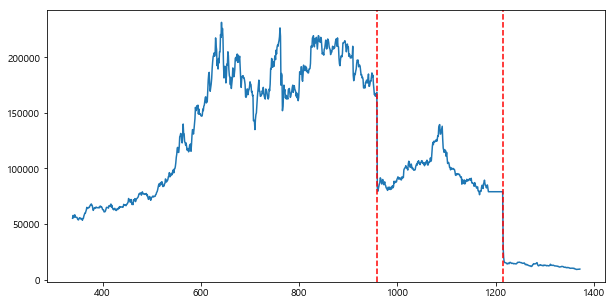

In [18]:
close["BGF"].plot(figsize=(10,5))
plt.axvline(x=1215, color='r',linestyle='--')
plt.axvline(x=959, color='r',linestyle='--')

In [19]:
for i in range(1,2):
    print(i)

1


In [20]:
len(ss200.company.unique())

51

In [21]:
a = [1,2]
b = [3,4]
for i,j in zip(a,b):
    print(i,j)

1 3
2 4


In [26]:
time

'2013-01-28'

2018-07-11 2:1
2016-05-25 5:1


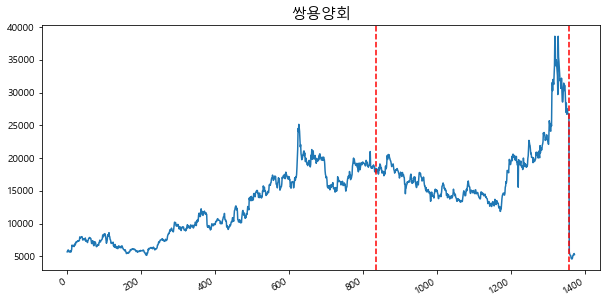

2018-05-08 5:1


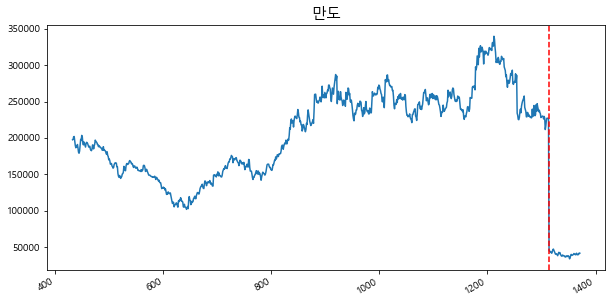

2018-05-04 50:1


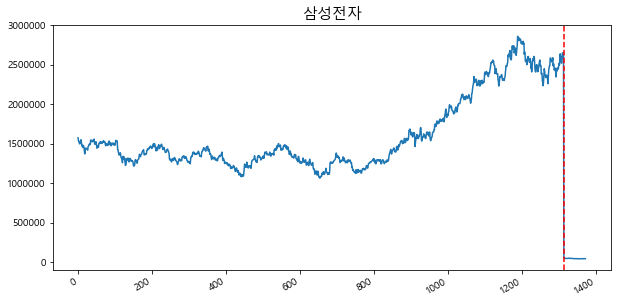

2018-04-30 10:1
2016-12-28 1.2:1
2015-12-29 1.1:1
2014-12-29 1.1:1
2013-12-30 1.05:1


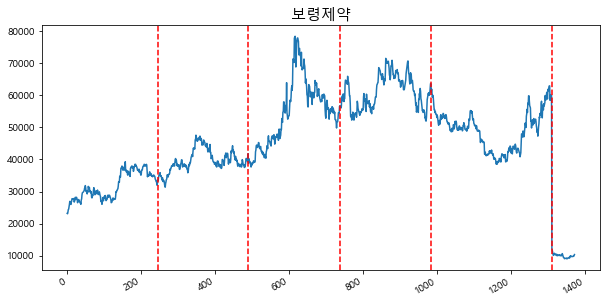

2018-03-07 1:2.5
2016-09-30 2:1


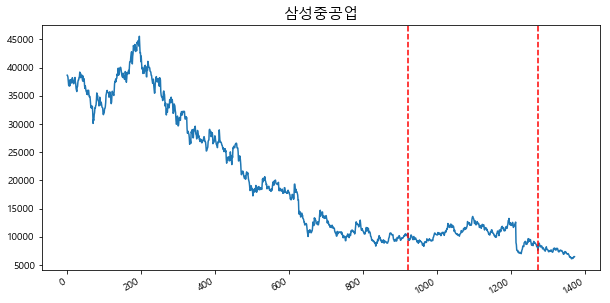

2018-02-05 1.071:1


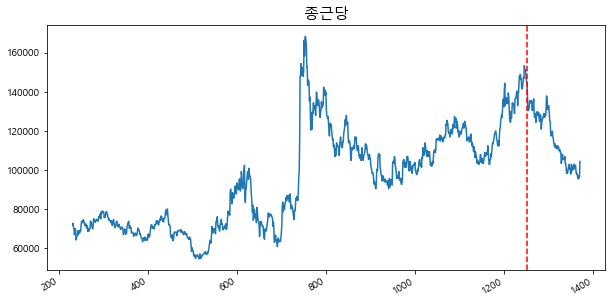

2018-01-31 2:1
2017-05-10 1.206:1


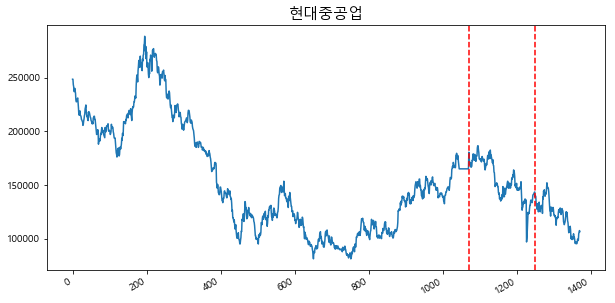

2018-01-11 1.034:1


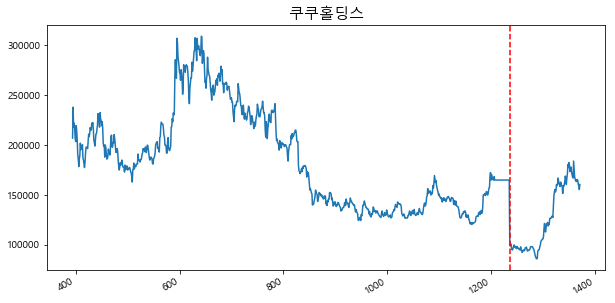

2018-01-05 1:4
2015-10-15 1.017:1


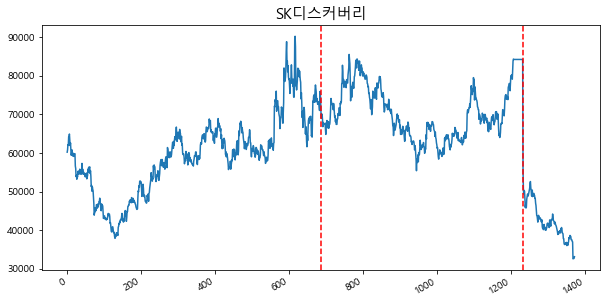

2017-12-27 1.02:1
2016-12-28 1.05:1
2015-12-29 1.03:1
2014-12-29 1.05:1
2013-12-27 1.03:1


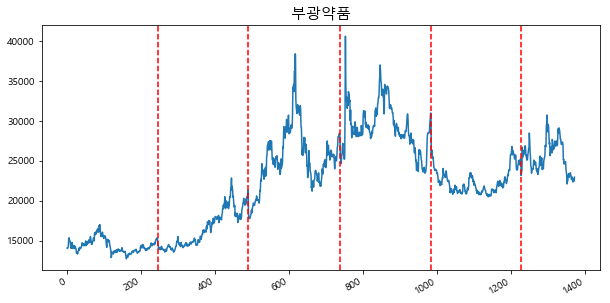

2017-12-27 1.02:1
2016-12-28 1.05:1
2015-12-29 1.03:1
2014-12-29 1.05:1
2013-12-27 1.05:1
2013-03-22 1:2


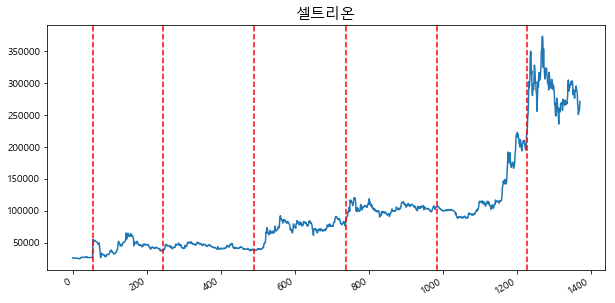

2017-12-27 1.02:1
2017-02-15 1.07:1
2015-12-29 1.02:1
2014-12-29 1.05:1
2014-02-10 1.104:1
2013-12-16 1.052:1


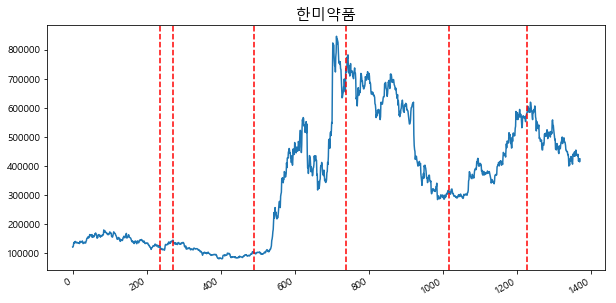

2017-12-27 1.05:1
2017-02-15 1.062:1
2015-12-29 1.005:1
2014-12-29 1.03:1
2013-12-30 1.1:1


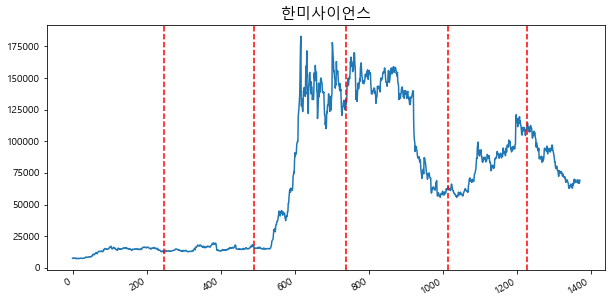

2017-12-27 1.02:1
2015-12-29 1.05:1
2014-12-29 1.05:1
2013-12-27 1.05:1


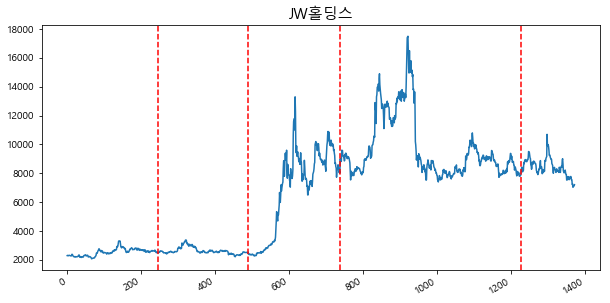

2017-12-27 1.015:1
2016-12-28 1.01:1
2015-12-29 1.03:1
2014-12-29 1.2:1
2013-12-27 1.06:1


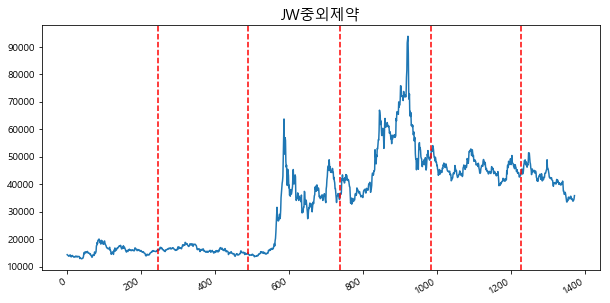

2017-12-27 1.5:1
2014-12-29 1.05:1


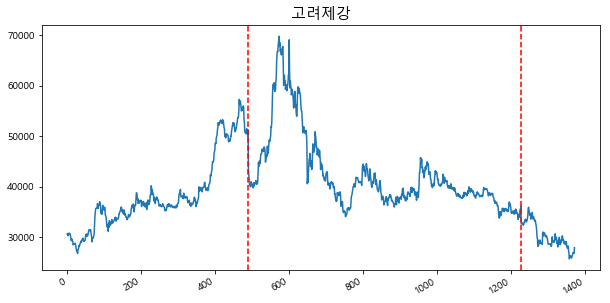

2017-12-27 3:1
2016-12-28 1.085:1


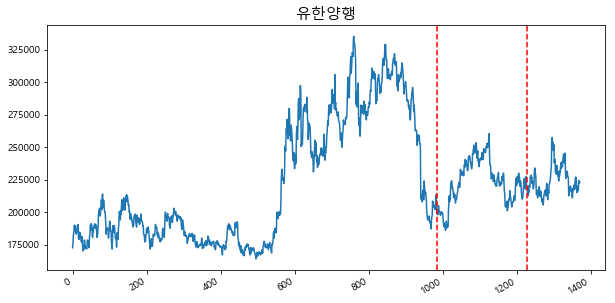

2017-12-08 2:1
2016-11-23 1.5:1


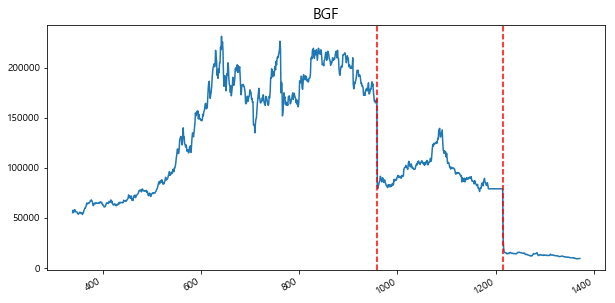

2017-10-30 1.76:1


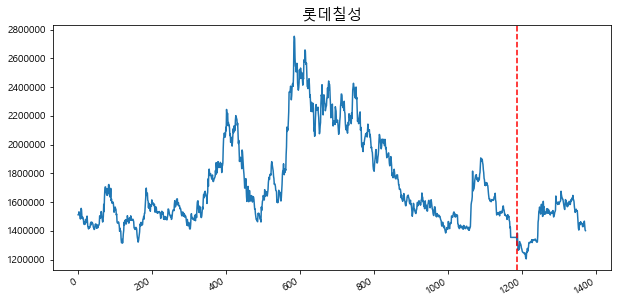

2017-10-30 1:1.21
2016-05-17 1.172:1


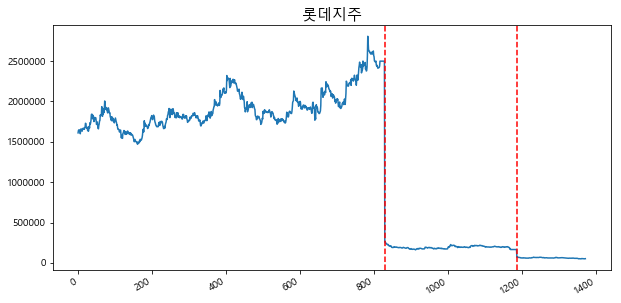

2017-10-30 1:1.12


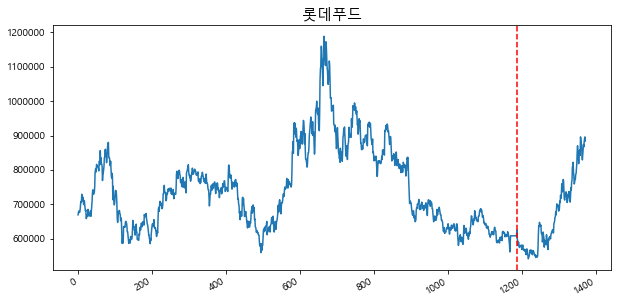

2017-10-30 1.322:1


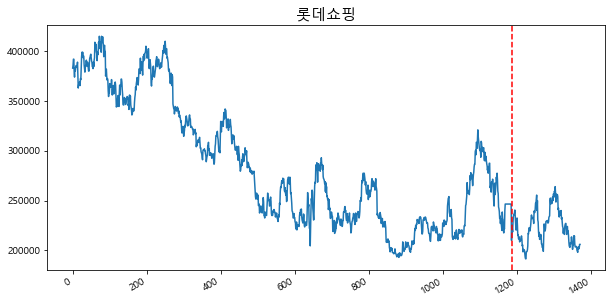

2017-07-24 1.06:1


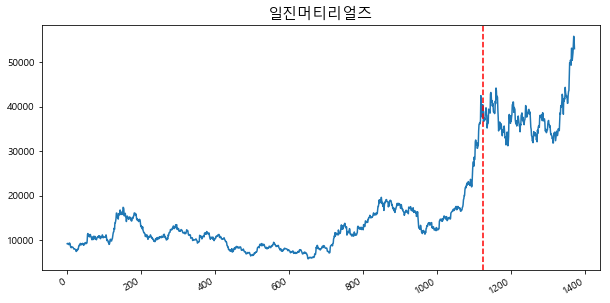

2017-07-07 2:1


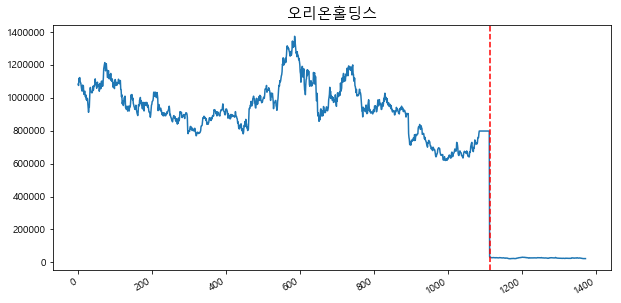

2017-01-31 2:1


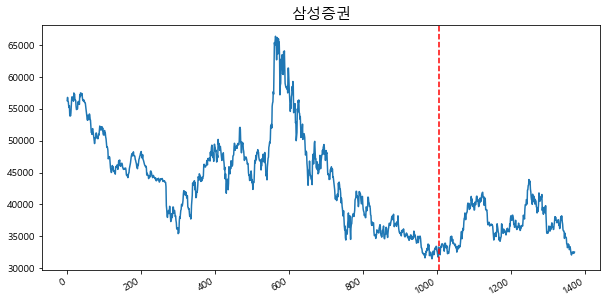

2017-01-24 50:1
2015-02-05 1.5:1
2013-09-16 1.033:1


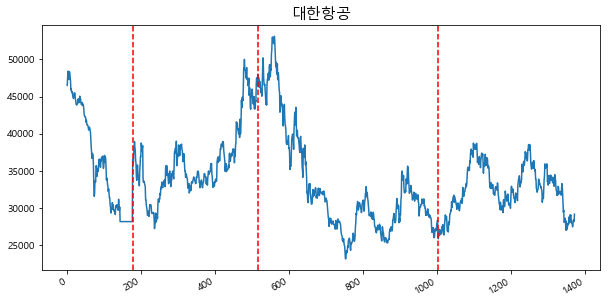

2017-01-16 1:6


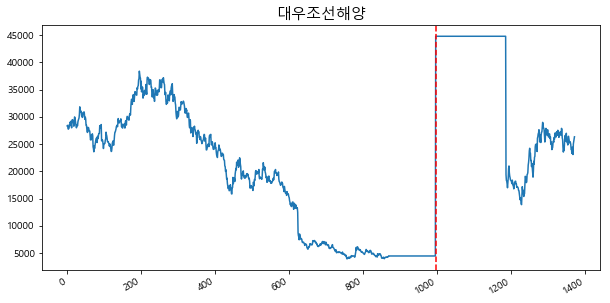

2016-11-09 1.5:1


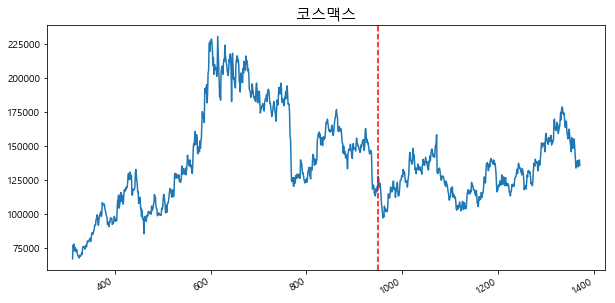

2016-02-16 1:10


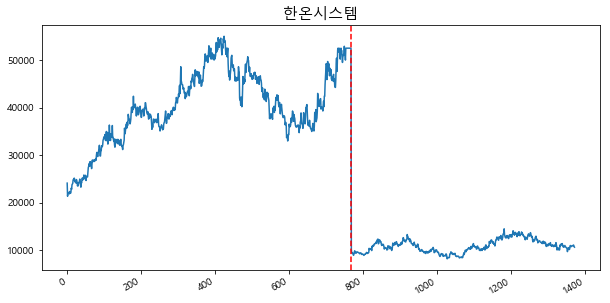

2015-12-29 1.034:1
2014-12-29 1.035:1
2013-12-27 1.03:1


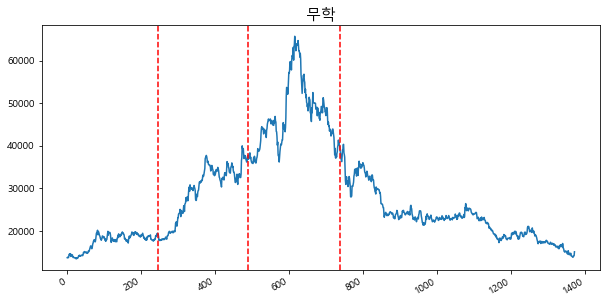

2015-12-29 1.107:1


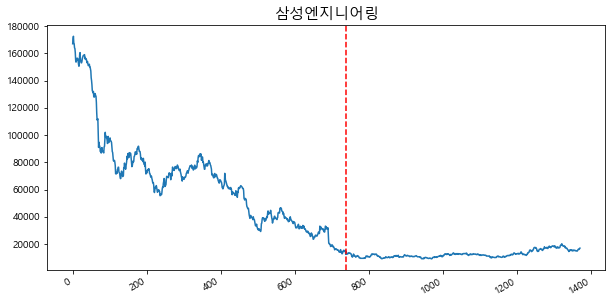

2015-12-04 2:1
2014-05-28 1:5


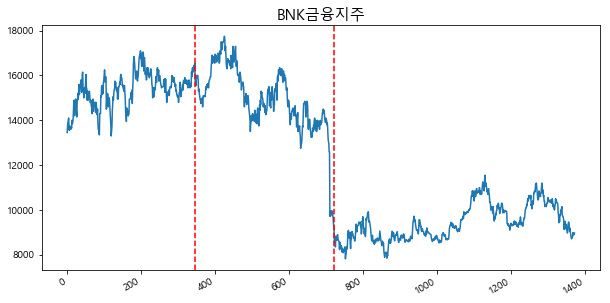

2015-07-31 1.555:1


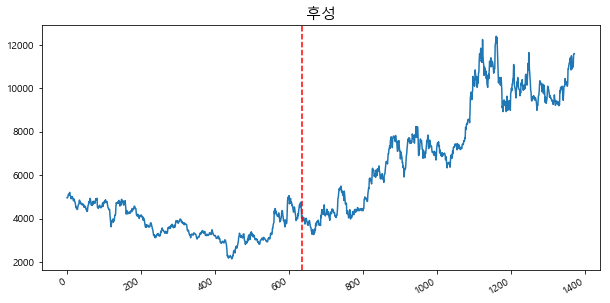

2015-07-29 1.04:1


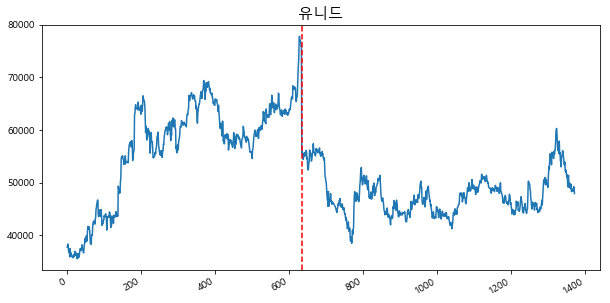

2015-07-27 1:2.91
2014-01-24 1:36.68


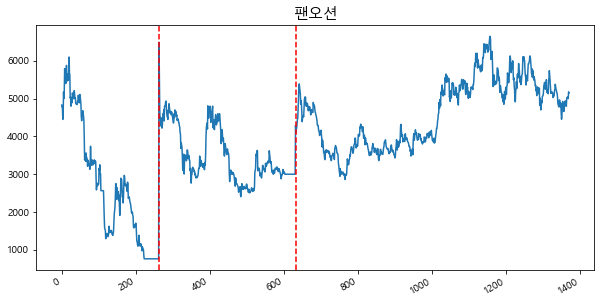

2015-07-16 1:8


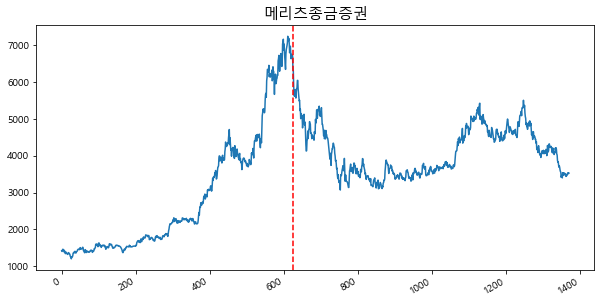

2015-06-09 10:1
2014-01-16 1.3:1


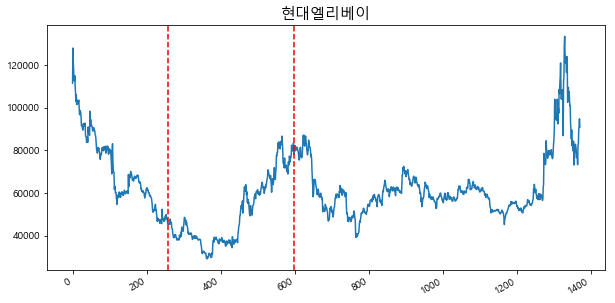

2015-05-08 10:1


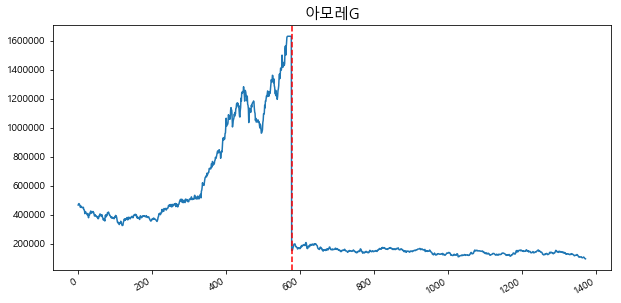

2015-05-08 10:1


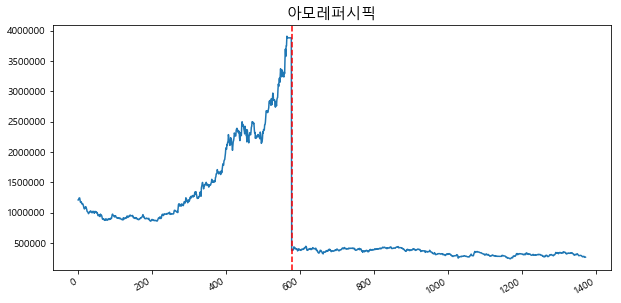

2014-10-06 1.226:1


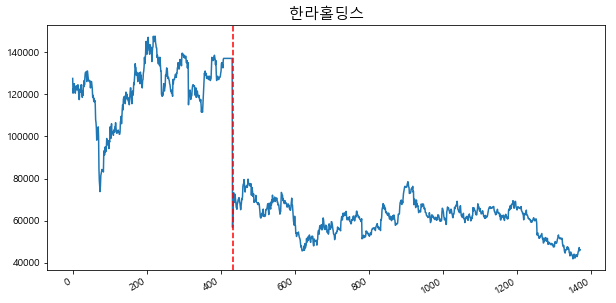

2014-07-07 1:5


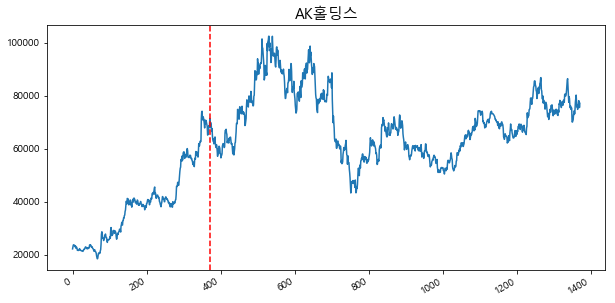

2014-07-02 1.051:1
2013-02-01 1.086:1


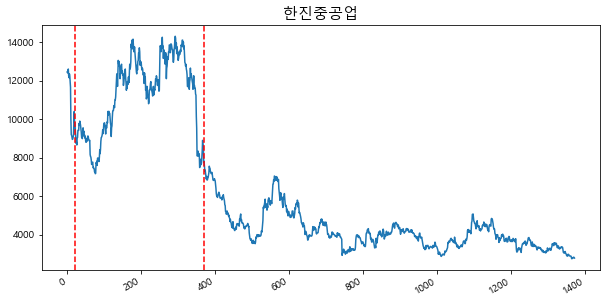

2014-06-20 1.043:1


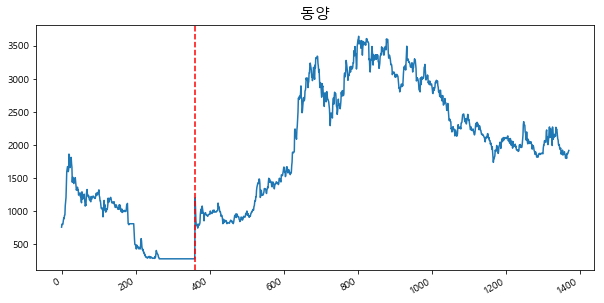

2014-05-16 1:5


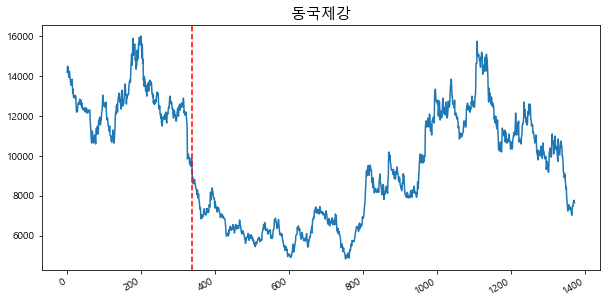

2014-04-23 1.356:1


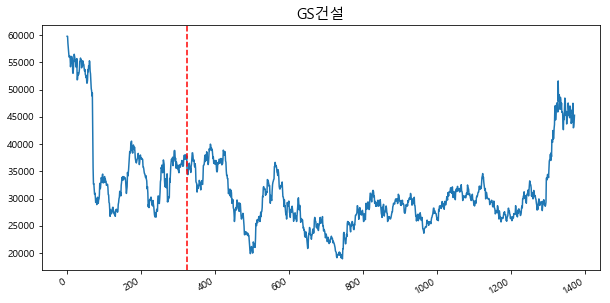

2013-11-27 1.057:1


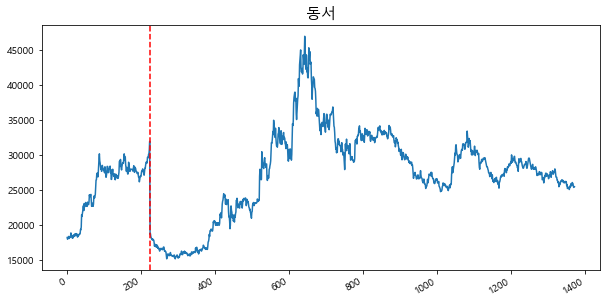

2013-09-05 2.5:1


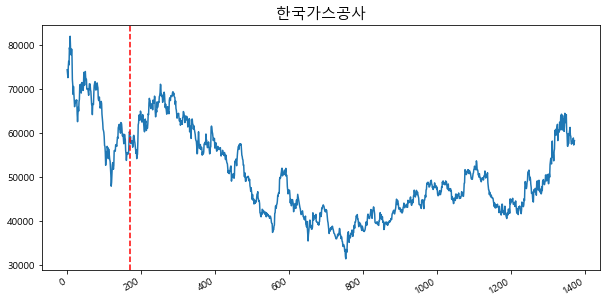

2013-08-29 1.187:1


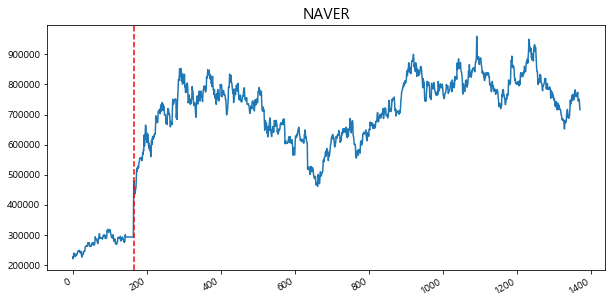

2013-06-07 1.4:1
2013-04-19 1.017:1


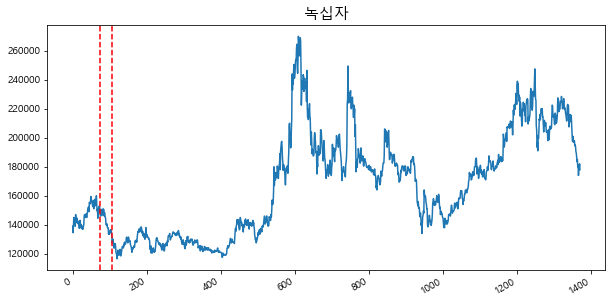

2013-04-08 1:2.69


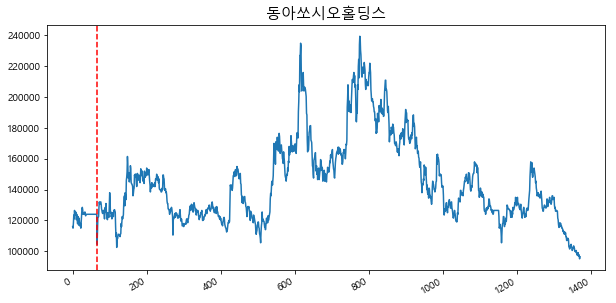

2013-01-28 1:10


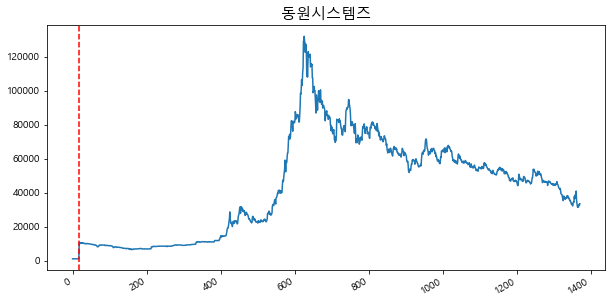

In [27]:
import sys
mod = sys.modules[__name__]

di = {}

for i in ss200.company.unique():
    temp = ss200[ss200.company == i].split_date
    time = ss200[ss200.company == i].split_date.iloc[0]
    ratio = ss200[ss200.company == i].split_ratio.iloc[0]
    indexing = np.where(close["일자"] == time)[0][0]
    close[i].plot(subplots=True, figsize=(10,5))
    plt.axvline(x=indexing, color='r',linestyle='--')
    if len(temp)>1:
        time_li = []
        ratio_li = []
        for j in range(1,len(temp)):
            setattr(mod, "time{}".format(j), ss200[ss200.company == i].split_date.iloc[j])
            setattr(mod, "ratio{}".format(j), ss200[ss200.company == i].split_ratio.iloc[j])
            indexing = np.where(close["일자"] == getattr(mod, "time{}".format(j)))[0][0]
            plt.axvline(x=indexing, color='r',linestyle='--')
            time_li.append(getattr(mod, "time{}".format(j)))
            ratio_li.append(getattr(mod, "ratio{}".format(j)))
        print(time, ratio)
        for m, n in zip(time_li, ratio_li):
            print(m, n)
        time_li.append(time)
        di[i] = time_li
    else:
        print(time, ratio)
        di[i] = time
    plt.title(i, fontsize=15)
    plt.show()

In [32]:
list(di.keys())[0]

'쌍용양회'

In [38]:
list(di.values())[0]

['2016-05-25', '2018-07-11']

In [ ]:
for k in len(list(di.values())[0]):
    close[["일자", list(di.keys())[0]]]

In [53]:
'2016-05-25'

'2016-05-25'

In [39]:
for i,j in di.items():
    for k in j:
        print(close[close["일자"]==k][list(di.keys())[0]]
        break
    break

835    18400
Name: 쌍용양회, dtype: int64


In [55]:
di["쌍용양회"]

['2016-05-25', '2018-07-11']

In [57]:
time = "2016-05-25"
len(time)

10

In [60]:
di[i]

['2016-05-25', '2018-07-11']

In [61]:
len(di[i])

2

In [68]:
df = close.copy()
df.index = close.일자
del df["일자"]

['2016-11-23', '2017-12-08']


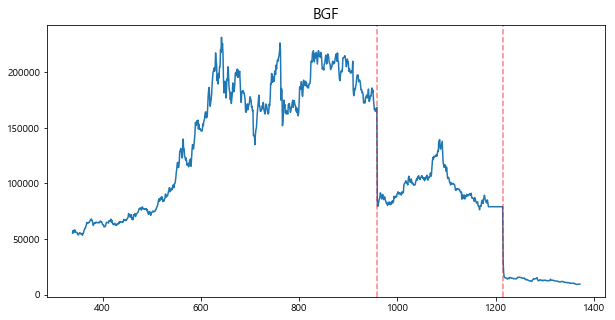

In [97]:
i = "BGF"
time = di[i]
close[i].plot(figsize=(10,5))
if len(time)>9:
    indexing = np.where(close["일자"] == time)[0][0]
    plt.axvline(x=indexing, color='r',linestyle='--', alpha=0.5)
else:
    for j in time:
        indexing = np.where(close["일자"] == j)[0][0]
        plt.axvline(x=indexing, color='r',linestyle='--', alpha=0.5)
plt.title(i, fontsize=15)
print(time)

In [105]:
df.loc["2017-12-05":"2017-12-08"][i]

일자
2017-12-05    79100.0
2017-12-06    79100.0
2017-12-07    79100.0
2017-12-08    28550.0
Name: BGF, dtype: float64

In [104]:
df["BGF"][[np.isnan(i)==False for i in df["BGF"]]]

일자
2014-05-19    55200.0
2014-05-20    57700.0
2014-05-21    55800.0
2014-05-22    56100.0
2014-05-23    58300.0
2014-05-26    58100.0
2014-05-27    56200.0
2014-05-28    56100.0
2014-05-29    56000.0
2014-05-30    56000.0
2014-06-02    54700.0
2014-06-03    54000.0
2014-06-05    53700.0
2014-06-09    54700.0
2014-06-10    55600.0
2014-06-11    55700.0
2014-06-12    55000.0
2014-06-13    54500.0
2014-06-16    55000.0
2014-06-17    54800.0
2014-06-18    53400.0
2014-06-19    55000.0
2014-06-20    55100.0
2014-06-23    57200.0
2014-06-24    58600.0
2014-06-25    59800.0
2014-06-26    59800.0
2014-06-27    61400.0
2014-06-30    62700.0
2014-07-01    65000.0
               ...   
2018-06-20    11100.0
2018-06-21    10800.0
2018-06-22    10750.0
2018-06-25    10950.0
2018-06-26    10750.0
2018-06-27    10900.0
2018-06-28    10800.0
2018-06-29    10800.0
2018-07-02    10500.0
2018-07-03    10200.0
2018-07-04    10250.0
2018-07-05    10200.0
2018-07-06    10300.0
2018-07-09    10300.0
2018-07

In [ ]:
df.loc["2016-11-20":"2016-11-25"][i]

In [66]:
returns = pd.read_csv("./data/infomax_data/new/single/return.csv", encoding = "cp949", low_memory=False)
close = close.loc[:1371]
close.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,2013-01-02,22250,NaN,NaN,13450,124500,32250,103500,362000,44450,...,248500,NaN,216000,32000,122500,43500,74300,NaN,4965,25600
1,2013-01-03,23000,NaN,NaN,13750,123500,32100,102000,369000,43800,...,248500,NaN,206000,31750,120500,41800,74800,NaN,4955,25500
2,2013-01-04,23700,NaN,NaN,13900,128000,32300,107500,375000,43600,...,243500,NaN,206000,32650,123500,41550,74700,NaN,4980,25050
3,2013-01-07,23800,NaN,NaN,14000,127000,32750,107500,368000,44500,...,241500,NaN,208500,33150,125500,44000,73400,NaN,5080,25650
4,2013-01-08,23700,NaN,NaN,14100,122500,32650,113000,358000,42800,...,237000,NaN,210000,32100,125000,43750,71100,NaN,5130,26250


In [ ]:
df["쌍용양회"] = pd.concat((df.loc[:"2018-07-10"]["쌍용양회"] / 5, df.loc["2018-07-11":]["쌍용양회"]))
df["만도"] = pd.concat((df.loc[:"2018-05-07"]["만도"] / 5, df.loc["2018-05-08":]["만도"]))
df["삼성전자"] = pd.concat((df.loc[:"2018-05-03"]["삼성전자"] / 50, df.loc["2018-05-04":]["삼성전자"]))
df["보령제약"] = pd.concat((df.loc[:"2018-04-29"]["보령제약"] / 5, df.loc["2018-04-30":]["보령제약"]))
df["쿠쿠홀딩스"] = pd.concat((df.loc[:"2018-01-10"]["쿠쿠홀딩스"] / 1.318, df.loc["2018-01-11":]["쿠쿠홀딩스"]))
df["SK디스커버리"] = pd.concat((df.loc[:"2018-01-04"]["SK디스커버리"] / 1.6, df.loc["2018-01-05":]["SK디스커버리"]))
df["고려제강"] = pd.concat((df.loc[:"2014-12-28"]["고려제강"] / 1.2, df.loc["2014-12-29":]["고려제강"]))
df["BGF"] = pd.concat((df.loc[:"2016-11-22"]["BGF"] / 4,df.loc["2016-11-23":"2017-12-07"]["BGF"] / 2, df.loc["2017-12-08":]["BGF"]))
df["롯데지주"] = pd.concat((df.loc[:"2016-05-16"]["롯데지주"] / 25,df.loc["2016-05-17":"2017-10-29"]["롯데지주"] / 2.5, df.loc["2017-10-30":]["롯데지주"]))
df["오리온홀딩스"] = pd.concat((df.loc[:"2017-07-06"]["오리온홀딩스"] / 24.25, df.loc["2017-07-07":]["오리온홀딩스"]))
df["대우조선해양"] = pd.concat((df.loc[:"2017-01-15"]["대우조선해양"] * 5, df.loc["2017-01-16":"2017-10-27"]["대우조선해양"] / 2, df.loc["2017-10-28":]["대우조선해양"]))
df["한온시스템"] = pd.concat((df.loc[:"2016-02-15"]["한온시스템"] / 5, df.loc["2016-02-16":]["한온시스템"]))
df["유니드"] = pd.concat((df.loc[:"2015-07-28"]["유니드"] / 1.5, df.loc["2015-07-29":]["유니드"]))
df["팬오션"] = pd.concat((df.loc[:"2014-01-23"]["팬오션"] * 8.515*1.43,df.loc["2014-01-24":"2015-07-26"]["팬오션"] * 1.43, df.loc["2015-07-27":]["팬오션"]))
df["아모레G"] = pd.concat((df.loc[:"2015-05-07"]["아모레G"] / 9.3, df.loc["2015-05-08":]["아모레G"]))
df["아모레퍼시픽"] = pd.concat((df.loc[:"2015-05-07"]["아모레퍼시픽"] / 10, df.loc["2015-05-08":]["아모레퍼시픽"]))
df["한라홀딩스"] = pd.concat((df.loc[:"2014-10-05"]["한라홀딩스"] / 2.2025, df.loc["2014-10-06":]["한라홀딩스"]))
df["동양"] = pd.concat((df.loc[:"2014-06-19"]["동양"] * 5.157, df.loc["2014-06-20":]["동양"]))
df["동서"] = pd.concat((df.loc[:"2013-11-26"]["동서"] / 1.7525, df.loc["2013-11-26":]["동서"]))
df["동서"].iloc[224] = (df["동서"].iloc[223]+df["동서"].iloc[225])/2
df["NAVER"] = pd.concat((df.loc[:"2013-08-28"]["NAVER"] * 1.4598, df.loc["2013-08-29":]["NAVER"]))
df["동원시스템즈"] = pd.concat((df.loc[:"2013-01-27"]["동원시스템즈"] * 10, df.loc["2013-01-28":]["동원시스템즈"]))

In [ ]:
for i in ss200.company.unique():
    temp = ss200[ss200.company == i].split_date
    time = ss200[ss200.company == i].split_date.iloc[0]
    ratio = ss200[ss200.company == i].split_ratio.iloc[0]
    indexing = np.where(returns["일자"] == time)[0][0]
    returns[i].plot(subplots=True, figsize=(10,5))
    plt.axvline(x=indexing, color='r',linestyle='--')
    if len(temp)>1:
        time_li = []
        ratio_li = []
        for j in range(1,len(temp)):
            setattr(mod, "time{}".format(j), ss200[ss200.company == i].split_date.iloc[j])
            setattr(mod, "ratio{}".format(j), ss200[ss200.company == i].split_ratio.iloc[j])
            indexing = np.where(returns["일자"] == getattr(mod, "time{}".format(j)))[0][0]
            plt.axvline(x=indexing, color='r',linestyle='--')
            time_li.append(getattr(mod, "time{}".format(j)))
            ratio_li.append(getattr(mod, "ratio{}".format(j)))
        print(time, ratio)
        for m, n in zip(time_li, ratio_li):
            print(m, n)
    else:
        print(time, ratio)
    plt.title(i, fontsize=15)
    plt.show()